In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import constrained_maximum_entropy as CME

In [2]:
np.random.seed(5)

In [3]:
observations = {
    "mean": 87,
    "std": 8.727,
    "range_": (0, 100),
    "limits": (40, 99),
    "bins": 101,
    "n": 140,
    "count 100": 0,
}


distribution = CME.MaxEntropyDistribution(**observations)
distribution.fit_model()

Model has converged


Predicted Mean: 87.00 Predicted STD: 8.73
True Mean: 87 True STD: 8.727


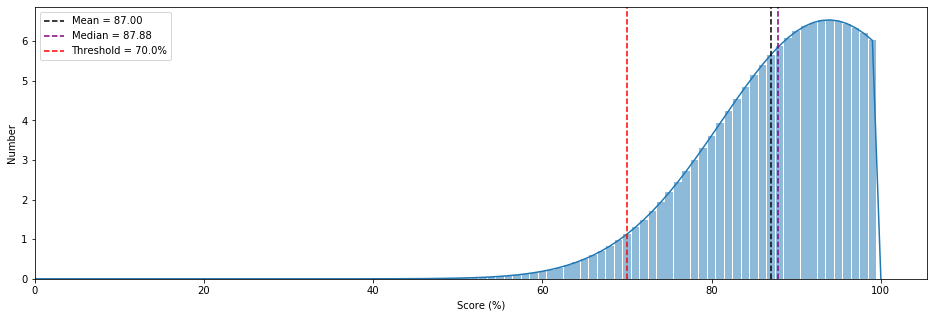

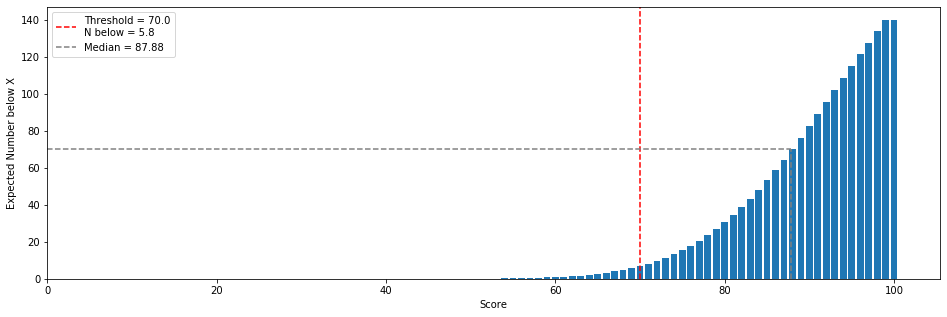

In [4]:
predicted_probabilities = distribution.model.probdist()
discretizing_n = observations.get("n", 1)

THRESHOLD = np.diff(distribution.range)[0] * 0.70 + distribution.range[0]

predicted_mean = CME.probability_mean(distribution.sample_space, predicted_probabilities)
predicted_std = CME.probability_std(distribution.sample_space, predicted_probabilities)
predicted_median = CME.approx_probability_median(distribution.sample_space, predicted_probabilities)

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(distribution.sample_space, predicted_probabilities * discretizing_n)
ax.bar(distribution.sample_space, predicted_probabilities * discretizing_n,
       width=np.diff(distribution.sample_space)[0] * .9, alpha=.5)
ax.axvline(predicted_mean, linestyle="--", label=f"Mean = {predicted_mean:.2f}", color="k")
ax.axvline(predicted_median, linestyle="--", label=f"Median = {predicted_median:.2f}", color="purple")
ax.axvline(THRESHOLD, linestyle="--", color="red", label=f"Threshold = {THRESHOLD}%")
ax.legend()
ax.set_xlim(distribution.sample_space[0], None)

ax.set_xlabel("Score (%)")
ax.set_ylabel("Number")
print(f"Predicted Mean: {predicted_mean:.2f}", f"Predicted STD: {predicted_std:.2f}")
print("True Mean:", observations.get("mean"), "True STD:", observations.get("std"))
fig.savefig("plots/constrained_pdf.png", dpi=100)

fig, ax = plt.subplots(figsize=(16, 5))
below_scores = np.cumsum(predicted_probabilities) * discretizing_n
ax.bar(distribution.sample_space, below_scores)
ax.set_ylabel("Expected Number below X")
ax.set_xlabel("Score")
n_below = round(np.sum(predicted_probabilities[distribution.sample_space < THRESHOLD]) * discretizing_n, 1)
ax.axvline(THRESHOLD, linestyle="--", color="red",
           label=f"Threshold = {THRESHOLD}\nN below = {n_below:.1f}")

ax.plot((predicted_median, predicted_median),
        (distribution.sample_space[0], discretizing_n // 2), linestyle="--",
        label=f"Median = {predicted_median:.2f}", color="gray")
ax.plot((distribution.sample_space[0], predicted_median), (discretizing_n // 2, discretizing_n // 2),
        linestyle="--", color="gray")
ax.legend()
ax.set_xlim(distribution.sample_space[0], None)
fig.savefig("plots/constrained_cdf.png", dpi=100)

$$\mu_{scaled} = 70$$
$$\sigma_{scaled} = 8$$
$$x_{scaled} = 81$$

$$\mu_i = 74$$
$$x_i = 86$$
$$ \sigma_i = ?$$

$$\mu_{scaled} = \mu_i + \Delta\mu$$
$$\sigma_{scaled} = \alpha * \sigma_i$$

\begin{equation*}
x_{scaled} = \left(\frac{x_i - \mu}{\sigma}\right) * \sigma_{scaled} + \mu_{scaled}
\end{equation*}

$$ \frac{x_{scaled} - \mu_{scaled}}{\sigma_{scaled}}= \left(\frac{x_i - \mu}{\sigma}\right)$$

$$ \sigma =  \sigma_{scaled}\frac{\left({x_i - \mu}\right)}{x_{scaled} - \mu_{scaled}}$$